### 🔙 Volver al [Índice](./Indice_Tablas_Frecuencias.ipynb)

## DATOS CUANTITATIVOS CONTINUOS

In [1]:
# Celda: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración para mostrar los gráficos dentro del Notebook
%matplotlib inline


In [2]:
# Celda 2: Generar datos cuantitativos continuos (ejemplo: alturas en cm)
np.random.seed(42)  # Semilla para reproducibilidad
datos = np.random.normal(loc=170, scale=10, size=500).round(2)  # media=170, desv. estándar=10


In [3]:
# Celda 3: Calcular número de clases usando regla de Sturges
n = len(datos)
k = int(np.ceil(1 + 3.322 * np.log10(n)))
print(f"Número de clases (k): {k}")


Número de clases (k): 10


In [4]:
# Celda 4: Calcular amplitud y crear los intervalos
min_dato = datos.min()
max_dato = datos.max()
rango = max_dato - min_dato
amplitud = np.ceil(rango / k)

limites = np.arange(min_dato, max_dato + amplitud, amplitud)
clases = pd.IntervalIndex.from_breaks(limites, closed='left')


In [5]:
# Celda 5: Calcular frecuencias
frecuencia = pd.cut(datos, bins=clases).value_counts().sort_index()
frecuencia_relativa = (frecuencia / frecuencia.sum()).round(4)
frecuencia_acumulada = frecuencia.cumsum()
frecuencia_relativa_acumulada = frecuencia_relativa.cumsum().round(4)


In [6]:
# Celda 6: Crear la tabla de frecuencias
tabla_frecuencia = pd.DataFrame({
    'Intervalo': frecuencia.index.astype(str),
    'f': frecuencia.values,
    'fr': frecuencia_relativa.values,
    'fa': frecuencia_acumulada.values,
    'fra': frecuencia_relativa_acumulada.values
})

tabla_frecuencia


,Intervalo,f,fr,fa,fra
0,"[137.59, 145.59)",2,0.004,2,0.004
1,"[145.59, 153.59)",16,0.032,18,0.036
2,"[153.59, 161.59)",78,0.156,96,0.192
3,"[161.59, 169.59)",140,0.280,236,0.472
4,"[169.59, 177.59)",157,0.314,393,0.786
5,"[177.59, 185.59)",78,0.156,471,0.942
6,"[185.59, 193.59)",25,0.050,496,0.992
7,"[193.59, 201.59)",3,0.006,499,0.998
8,"[201.59, 209.59)",1,0.002,500,1.000


¿Qué significa cada columna?
Intervalo: Rango de valores continuos que se agrupan en clases (ej. alturas entre 145.1 y 150.6 cm).

f (frecuencia absoluta): Número de datos que caen dentro de ese intervalo.

fr (frecuencia relativa): Proporción de datos en el intervalo respecto al total, por ejemplo, 0.036 significa que el 3.6% de los datos están en esa clase.

fa (frecuencia acumulada): Suma acumulada de las frecuencias absolutas.

fra (frecuencia relativa acumulada): Suma acumulada de las frecuencias relativas (va del 0 a 1).

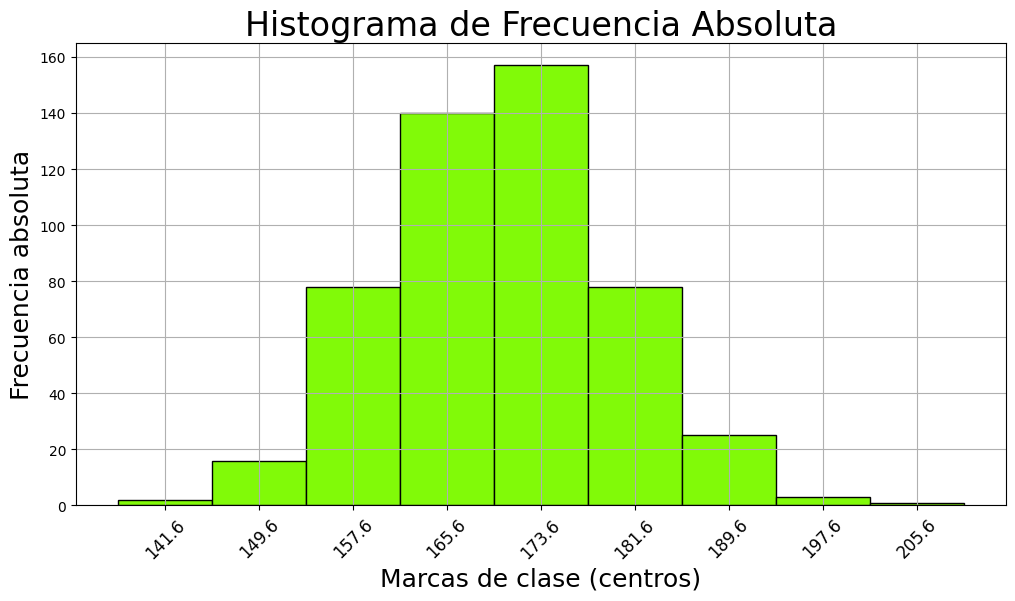

In [7]:
# Celda: Histograma de Frecuencia Absoluta usando estructura del profe
plt.figure(figsize=(12, 6))

# Marcas de clase: centro de cada intervalo (para eje x)
centros = [interval.mid for interval in frecuencia.index]

# Frecuencias absolutas (para eje y)
frecuencias = frecuencia.values

# Histograma personalizado
plt.bar(centros, frecuencias, width=amplitud, edgecolor="k", color="#81FA08")

plt.xticks(centros, rotation=45, fontsize=12)
plt.xlabel("Marcas de clase (centros)", fontsize=18)
plt.ylabel("Frecuencia absoluta", fontsize=18)
plt.title("Histograma de Frecuencia Absoluta", fontsize=24)
plt.grid()
plt.show()


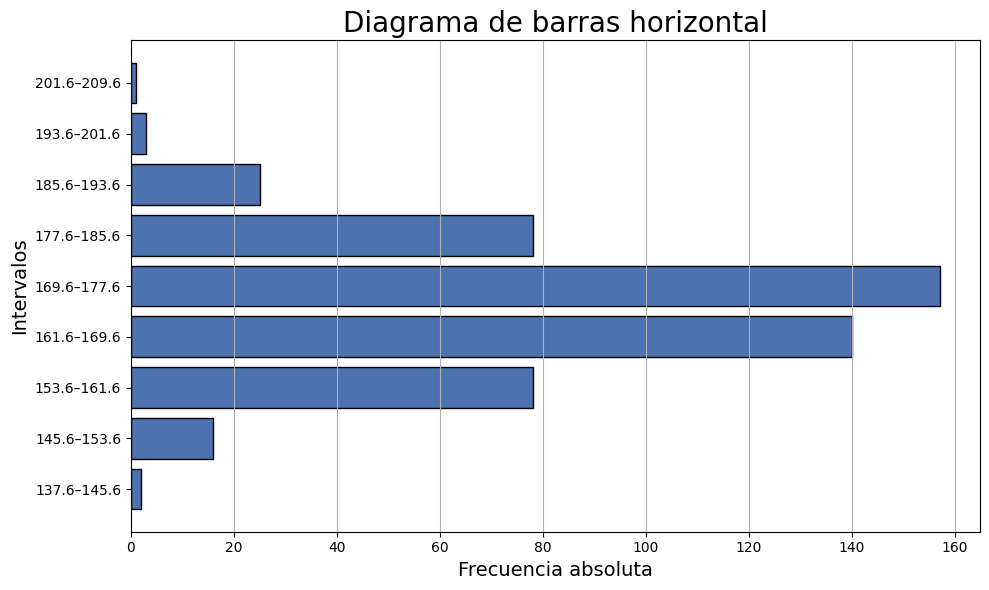

In [8]:
plt.figure(figsize=(10, 6))

# REDEFINIR etiquetas si no están en memoria
marcas_textos = [f"{interval.left:.1f}–{interval.right:.1f}" for interval in frecuencia.index]

plt.barh(marcas_textos, frecuencia.values, color="#4C72B0", edgecolor='black')
plt.xlabel("Frecuencia absoluta", fontsize=14)
plt.ylabel("Intervalos", fontsize=14)
plt.title("Diagrama de barras horizontal", fontsize=20)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


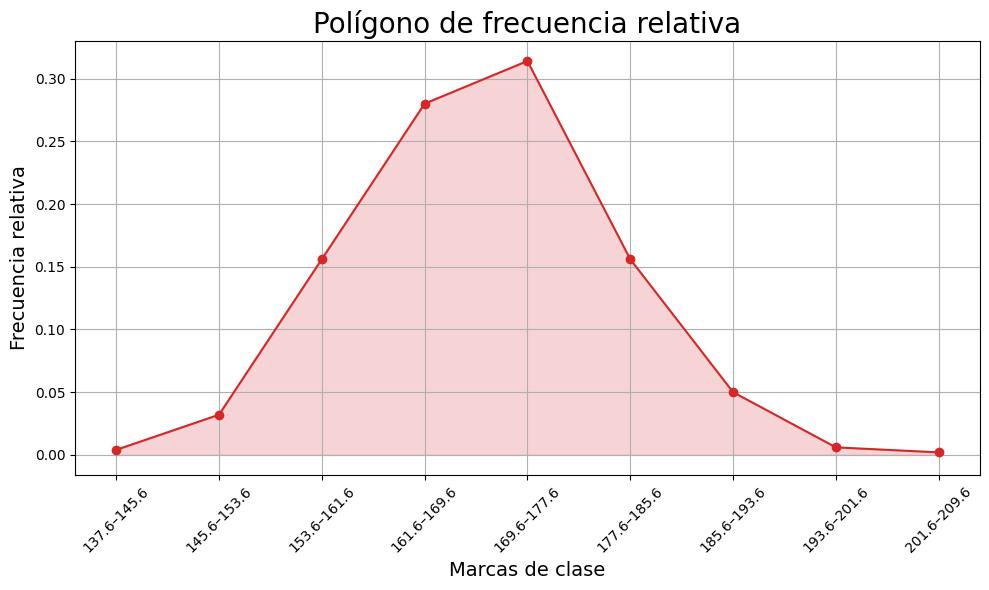

In [9]:
plt.figure(figsize=(10, 6))

# REDEFINIR si estás en una celda nueva
marcas_clase = [interval.mid for interval in frecuencia.index]
frecuencia_rel = frecuencia_relativa.values

plt.plot(marcas_clase, frecuencia_rel, marker='o', linestyle='-', color="#D62728")
plt.fill_between(marcas_clase, frecuencia_rel, color="#D62728", alpha=0.2)

# Texto del eje x (puedes usar los mismos intervalos como etiquetas)
marcas_textos = [f"{interval.left:.1f}–{interval.right:.1f}" for interval in frecuencia.index]
plt.xticks(marcas_clase, marcas_textos, rotation=45)

plt.xlabel("Marcas de clase", fontsize=14)
plt.ylabel("Frecuencia relativa", fontsize=14)
plt.title("Polígono de frecuencia relativa", fontsize=20)
plt.grid()
plt.tight_layout()
plt.show()


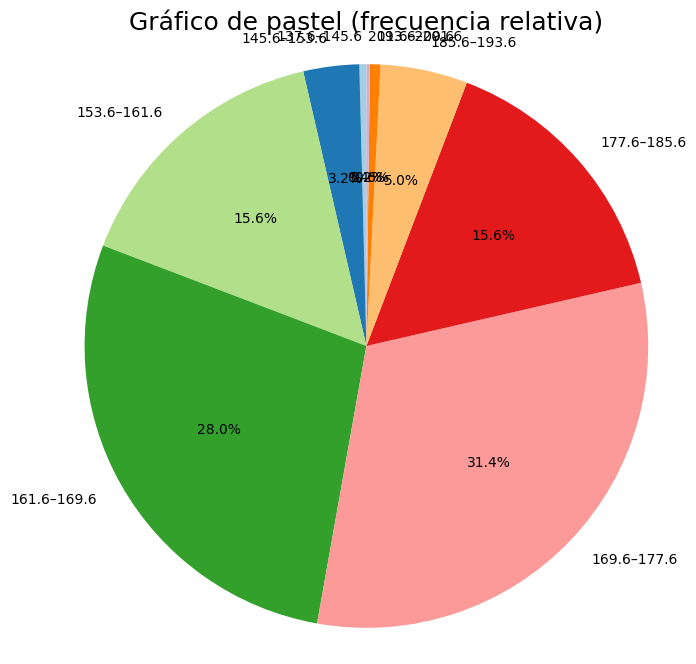

In [10]:
plt.figure(figsize=(8, 8))

plt.pie(frecuencia_rel, labels=marcas_textos, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Paired.colors)

plt.title("Gráfico de pastel (frecuencia relativa)", fontsize=18)
plt.axis('equal')  # Círculo perfecto
plt.show()


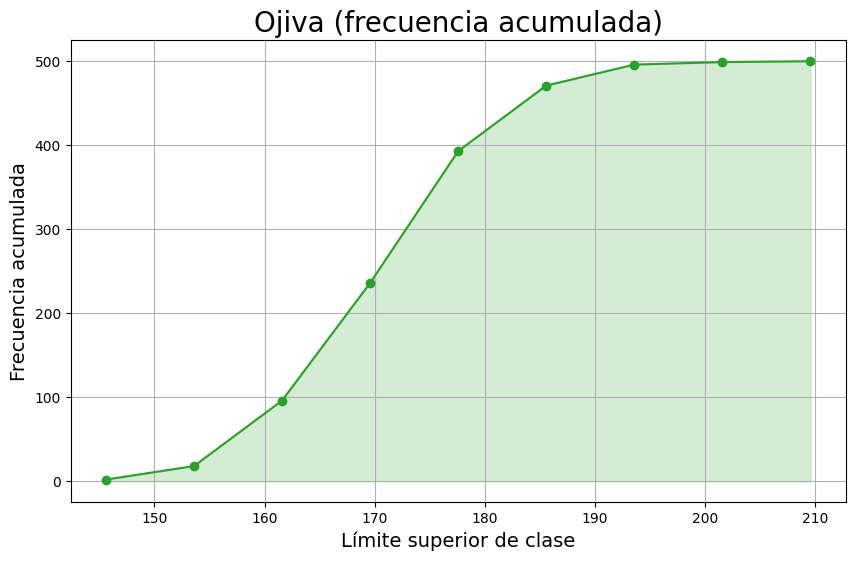

In [11]:
plt.figure(figsize=(10, 6))

# Usamos el límite superior de cada intervalo para marcar el punto acumulado
limites_superiores = [interval.right for interval in frecuencia.index]
fa = frecuencia_acumulada.values

plt.plot(limites_superiores, fa, marker='o', linestyle='-', color="#2CA02C")
plt.fill_between(limites_superiores, fa, color="#2CA02C", alpha=0.2)

plt.xlabel("Límite superior de clase", fontsize=14)
plt.ylabel("Frecuencia acumulada", fontsize=14)
plt.title("Ojiva (frecuencia acumulada)", fontsize=20)
plt.grid()
plt.show()
